### LSB Based Image in Image Steganography

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Image Embedding Function
def embed_image(cover_image_path, secret_image_path, output_path):
    cover_image = cv2.imread(cover_image_path)
    cover_image_rgb = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)
    secret_image = cv2.imread(secret_image_path)
    secret_image_rgb = cv2.cvtColor(secret_image, cv2.COLOR_BGR2RGB)
    
    height, width, channel = cover_image.shape
    secret_image_resized = cv2.resize(secret_image, (width // 2, height // 2))
    secret_image_resized_rgb = cv2.cvtColor(secret_image_resized,cv2.COLOR_BGR2RGB)
    stego_img = np.copy(cover_image)
    
    # Embed the secret image
    stego_img_flattened = stego_img.flatten()
    print("Cover Image",stego_img_flattened)
    secret_image_flattened = secret_image_resized.flatten()
    print("Secret Image",secret_image_flattened)
    total_pixels = len(secret_image_flattened)
    for px in range(total_pixels):
        pixel = secret_image_flattened[px]
        for i in range(4):
            #Get 2 msb of secret pixel
            bits_to_embed = (pixel & 0b11000000)>>6
            
            #Clear the lsb of the cover pixel and embed the bits
            pixel_pos = px * 4 + i
            stego_img_flattened[pixel_pos] = (stego_img_flattened[pixel_pos] & 0b11111100) | bits_to_embed
            pixel <<=2
    
    print("Stego Image",stego_img_flattened)
    stego_img = stego_img_flattened.reshape((height,width,channel))
    stego_img_rgb = cv2.cvtColor(stego_img,cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(output_path, stego_img)
    print(f"Secret image embedded and saved to {output_path}")
    
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.title("Cover Image")
    plt.imshow(cover_image_rgb)
    
    plt.subplot(1, 3, 2)
    plt.title("Secret Image Resized")
    plt.imshow(secret_image_resized_rgb)
    
    plt.subplot(1, 3, 3)
    plt.title("Stego Image")
    plt.imshow(stego_img_rgb)
    plt.show()


In [ ]:
#Secret Image Extraction Function
def extract_image(stego_image_path, output_path):
    stego_image = cv2.imread(stego_image_path)
    stego_image_rgb = cv2.cvtColor(stego_image, cv2.COLOR_BGR2RGB)
    
    height, width, channel = stego_image.shape
    
    extracted_image = np.zeros(shape=(height//2,width//2,channel),dtype=np.uint8)
    extract_image_height,extract_image_width,extract_image_channel = extracted_image.shape
    extracted_image_flattened = extracted_image.flatten()
    
    stego_image_flattened = stego_image.flatten()
    print("Stego Image",stego_image_flattened)
    total_pixels = len(extracted_image_flattened)
    for px in range(total_pixels):
        secret_pixel = 0
        
        for i in range(4):
            pixel_pos = px * 4 + i
            #Get two lsb of the stego pixel
            bits_to_extract = (stego_image_flattened[pixel_pos] & 0b00000011)                
            secret_pixel |= bits_to_extract
            if(i<3):
                secret_pixel <<=2
        
        extracted_image_flattened[px] = secret_pixel
    
    print("Extracted Image",extracted_image_flattened)
    extracted_image = extracted_image_flattened.reshape((extract_image_height,extract_image_width,extract_image_channel))
    extracted_image_rgb = cv2.cvtColor(extracted_image,cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(output_path, extracted_image)
    print(f"Secret image extracted and saved to {output_path}")
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.title("Extracted Image")
    plt.imshow(extracted_image_rgb)


Cover Image [ 16 105  66 ...  47 124  90]
Secret Image [ 71 117 175 ...  13  32  59]
Stego Image [ 17 104  65 ...  47 124  90]
Secret image embedded and saved to images/stego.png


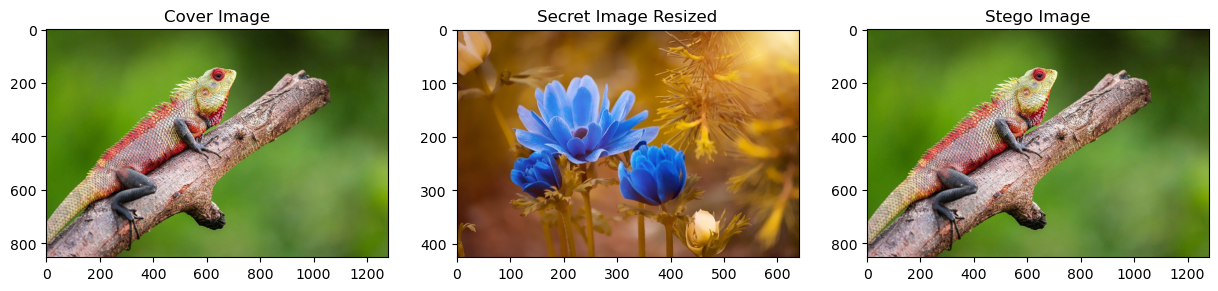

In [27]:
# Example usage
embed_image("images/cover.jpg", "images/secret.jpg", "images/stego.png") 
#Stego Image is saved in PNG format to avoid loss of embedded image data. When I used .jpg format the embedded secret image data was not recovered as OpenCV applies some
#optimizations while saving in jpg format which causes data to loose.
#The downside is the size of stego image increased significantly when saved in png format.

Stego Image [ 17 104  65 ...  47 124  90]
Extracted Image [ 71 117 175 ...  13  32  59]
Secret image extracted and saved to images/extracted.jpg


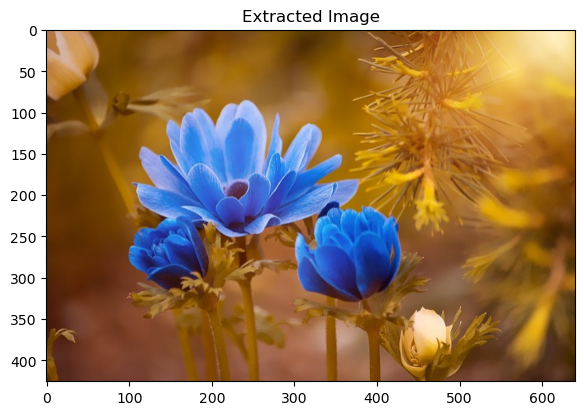

In [28]:
extract_image("images/stego.png", "images/extracted.jpg")